In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = w.acquire_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
train, validate, test = w.train_val_test(df)
train, validate, test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 3761            9.9             0.490         0.23            2.40      0.087   
 3740            7.7             0.280         0.35           15.30      0.056   
 1359           11.6             0.475         0.40            1.40      0.091   
 1230            7.7             0.180         0.34            2.70      0.066   
 4751            7.6             0.250         1.23            4.60      0.035   
 ...             ...               ...          ...             ...        ...   
 3772            7.6             0.320         0.58           16.75      0.050   
 5191            5.6             0.280         0.27            3.90      0.043   
 5226            6.4             0.370         0.20            5.60      0.117   
 5390            6.5             0.260         0.50            8.00      0.051   
 860             7.2             0.620         0.06            2.70      0.077   
 
       free su

In [4]:
wine_type = w.clean_wine()
wine_type.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,32.352941,46.184211,4.947368,1.781786,0.135714,5.588235,123.684211,0.029347,0.103235,17.894737
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,37.313433,32.653061,3.769231,1.465882,0.144118,3.880597,100.000000,0.014878,0.047761,25.769231
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,27.777778,35.434783,4.260870,1.533846,0.141538,4.259259,106.521739,0.018463,0.060370,23.478261
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,28.333333,42.133333,5.157895,1.720690,0.129310,3.166667,130.666667,0.016633,0.052667,31.578947
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,32.352941,46.184211,4.947368,1.781786,0.135714,5.588235,123.684211,0.029347,0.103235,17.894737


In [5]:
df['quality'] = pd.cut(df['quality'], [0, 3, 7, 10], labels=['low', 'medium', 'high'])

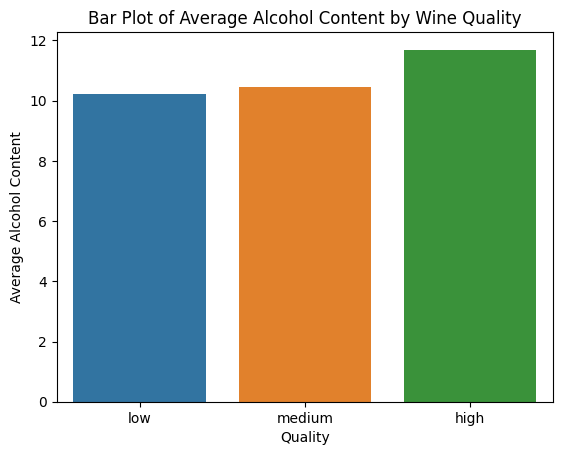

In [6]:
sns.barplot(data=df, x='quality', y='alcohol', ci = None)

plt.title('Bar Plot of Average Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol Content')
plt.show()

<BarContainer object of 4547 artists>

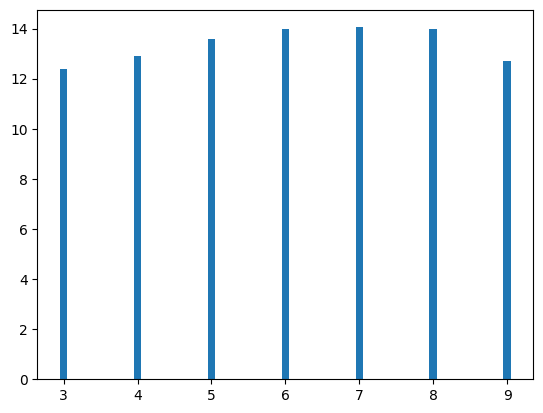

In [7]:
plt.bar(x='quality',height='alcohol',data=train,width=.1,)


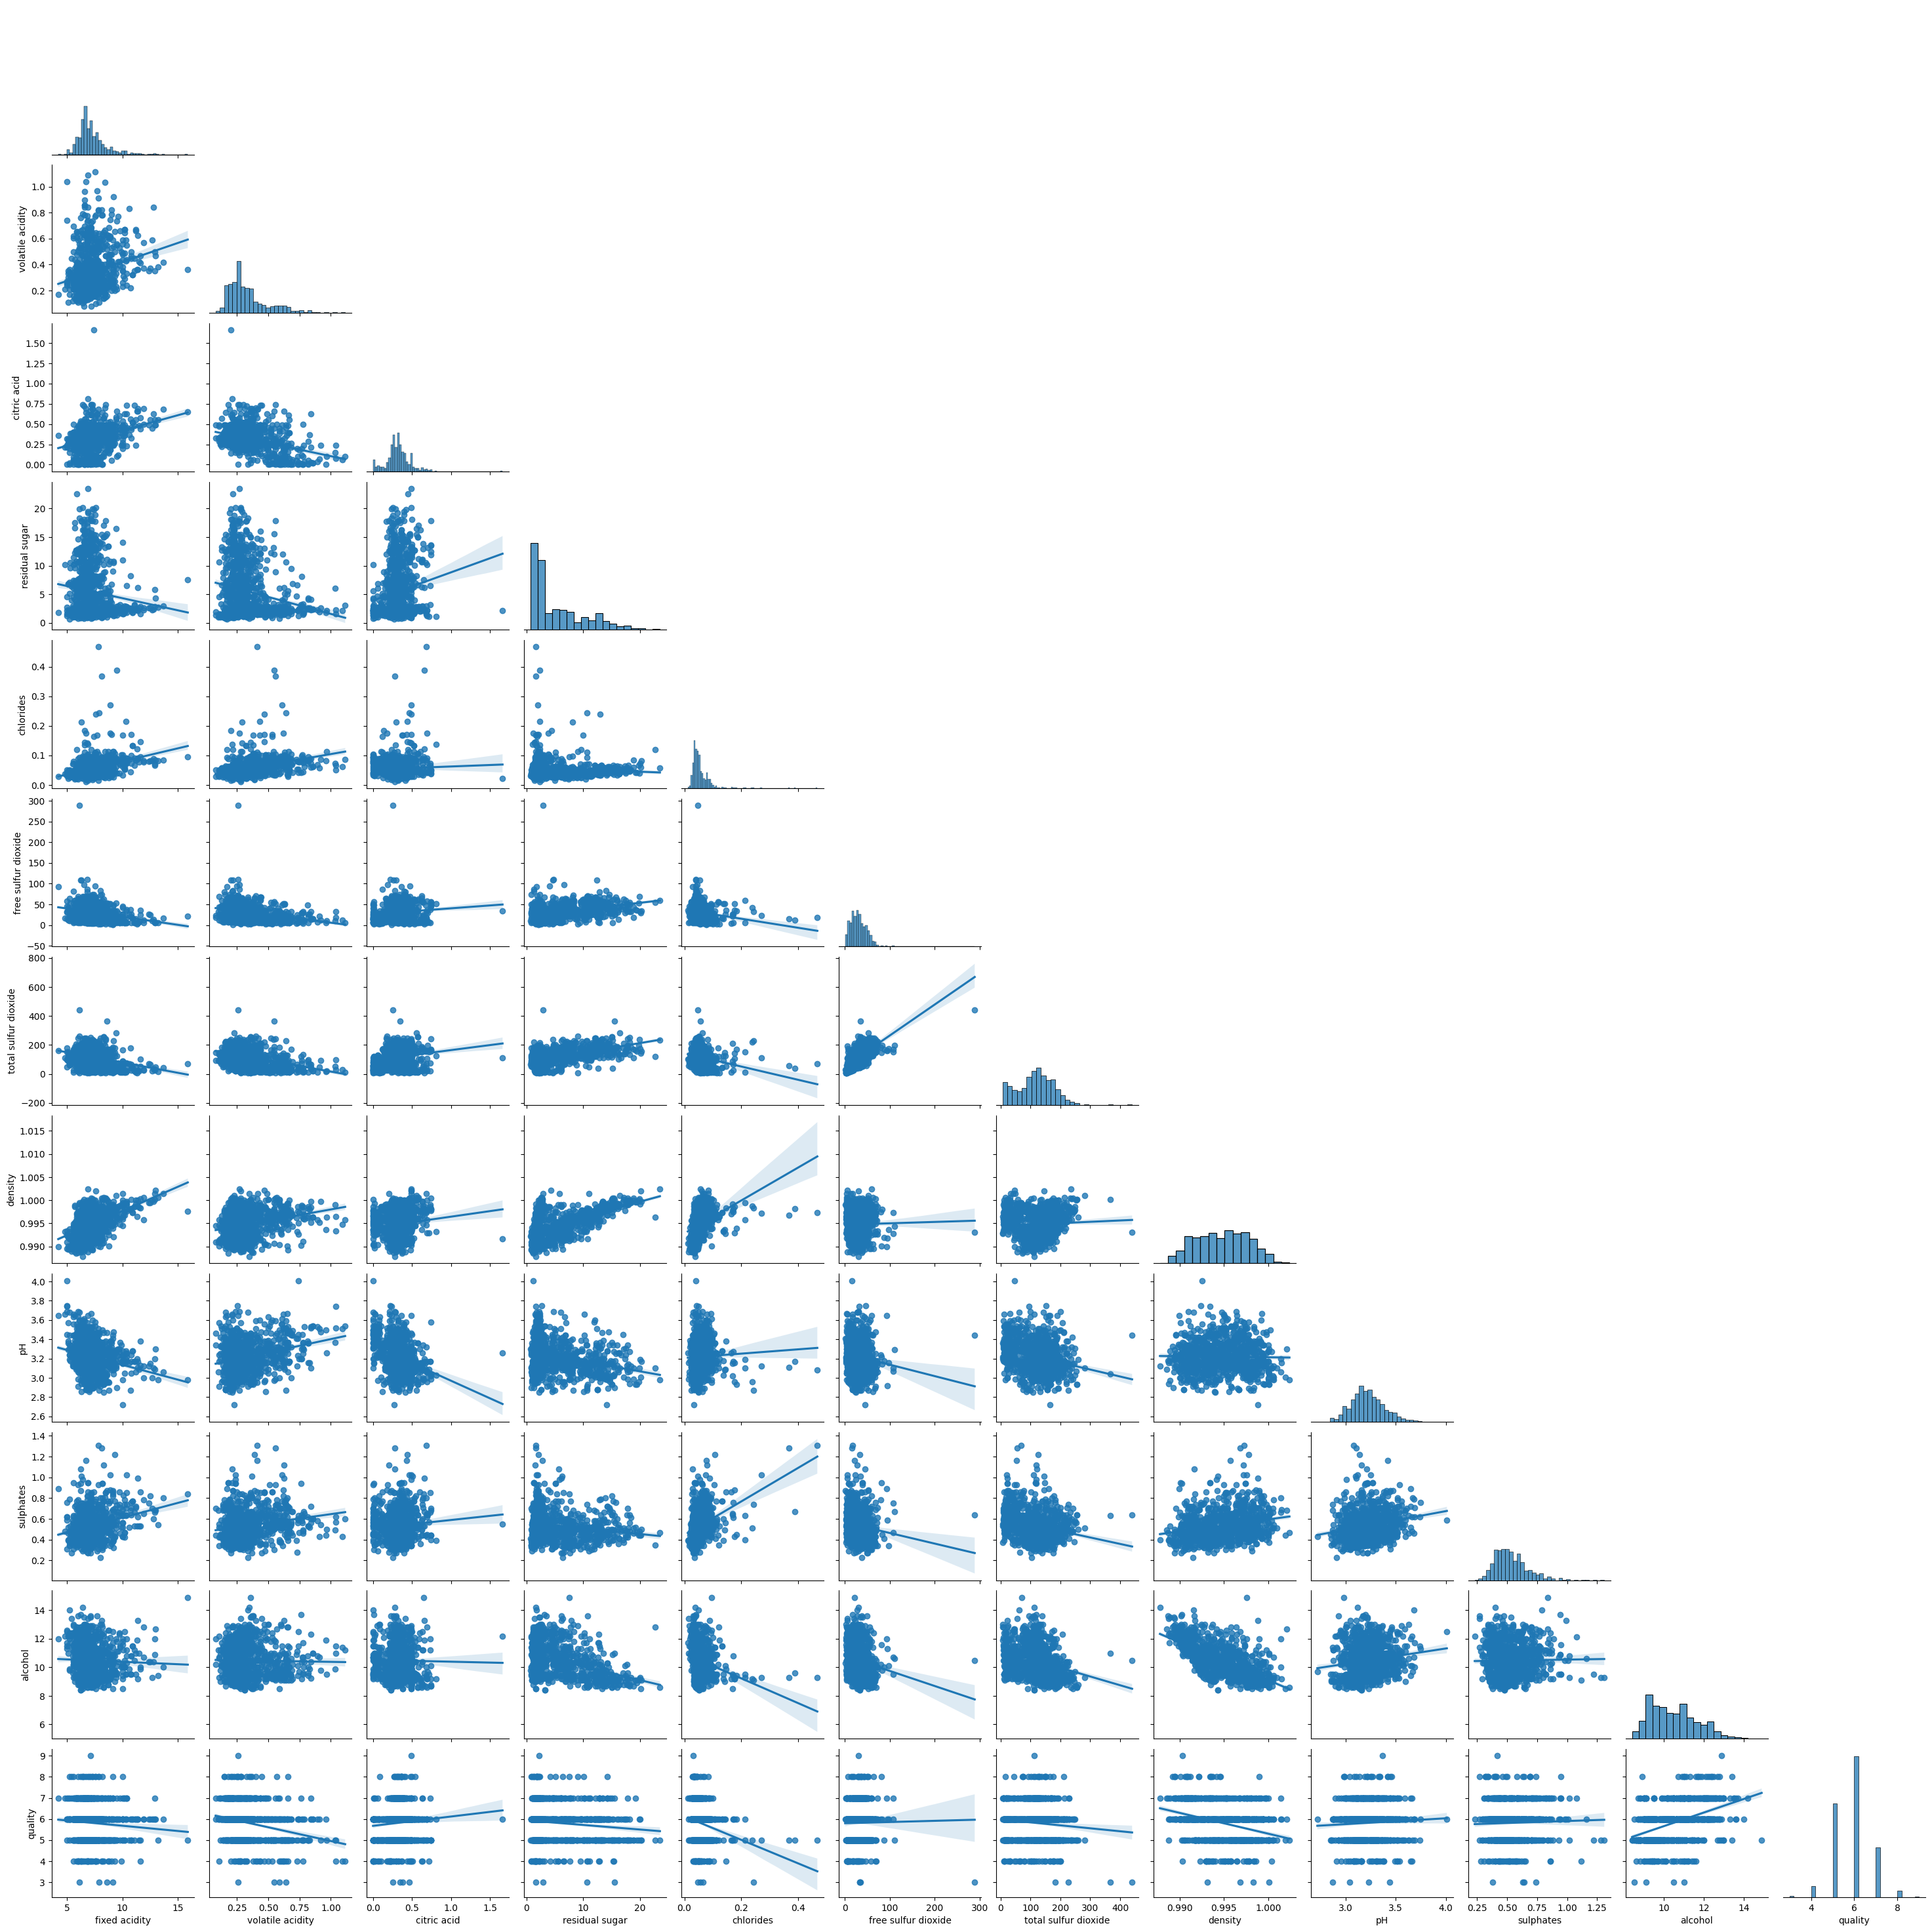

In [8]:
sns.pairplot(test, kind='reg',corner=True)
# grid of scatter plots for each pair of numerical columns in the test
# quickly examining relationships and correlations between numerical variables in the dataset

In [9]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

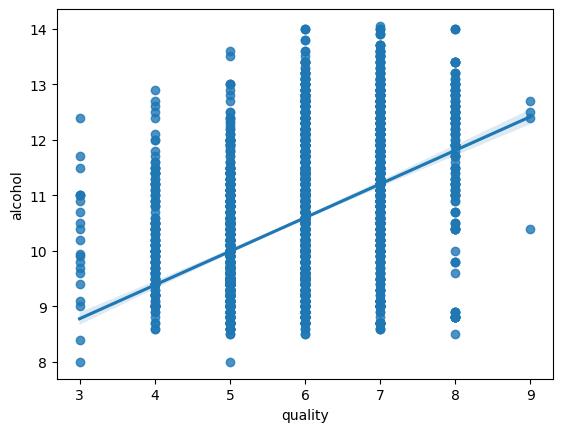

In [10]:
sns.regplot(y='alcohol', x='quality', data=train)
plt.show()

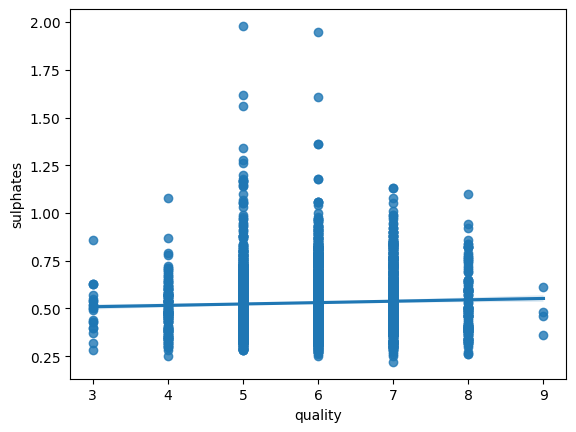

In [11]:
sns.regplot(y='sulphates', x='quality', data=train)
plt.show()

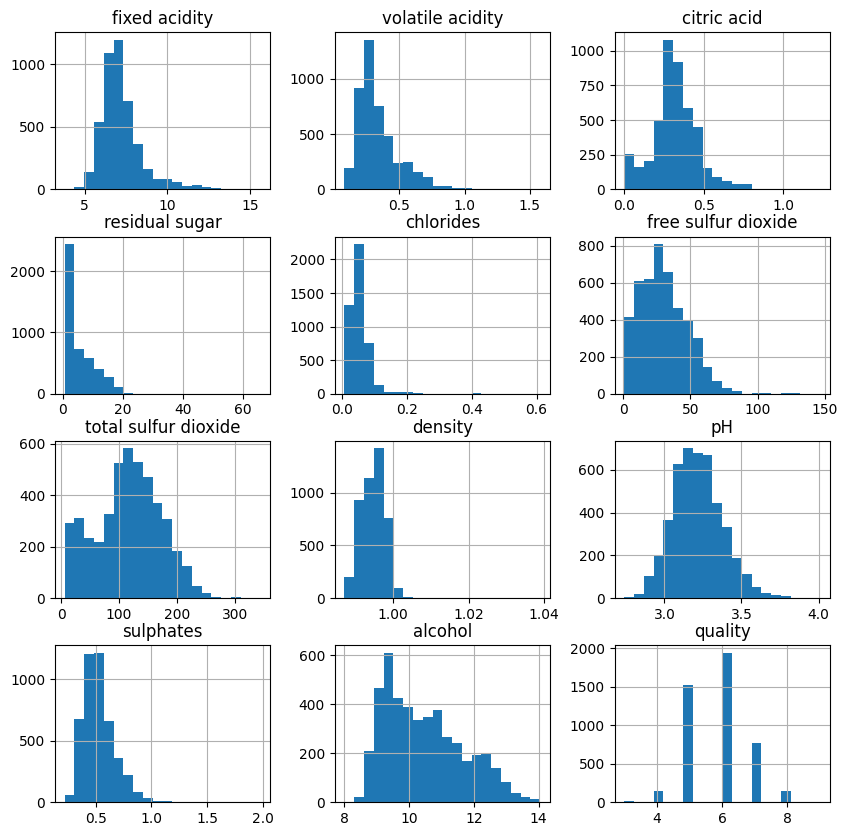

In [12]:
train.hist(bins=20, figsize=(10, 10))
plt.show()

In [13]:
# Convert the 'quality' column to category type if it isn't already
df['quality'] = df['quality'].astype('category')

# Convert category to numerical values
df['quality'] = df['quality'].cat.codes

# Now both columns should be numerical


In [14]:
import scipy.stats as stats

Null Hypothesis: There is no significant difference between the sulphate levels and wine quality.
Alternative Hypothesis: There is a significant difference between the sulphate levels and wine quality.


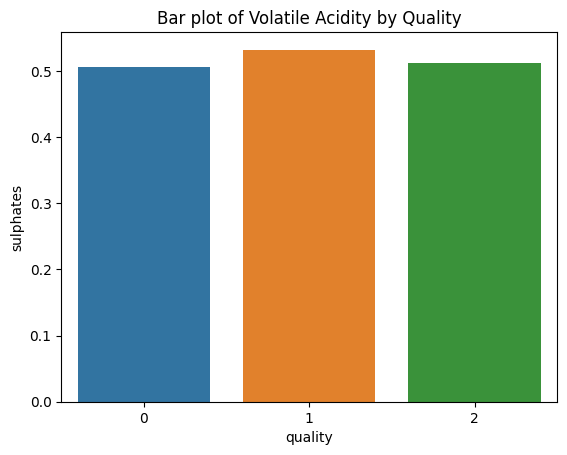

,T-Statistic,P-Value,Decision
0,-167.608918,0.0,Reject Null Hypothesis


In [15]:
def run_sulphates_ttest(data):
    '''
    runs a Ttest for sulphates vs quality
    '''
    # Check for columns
    if 'sulphates' not in data.columns or 'quality' not in data.columns:
        return "Columns not found in the DataFrame"
    
    # Define Hypothesis
    print("Null Hypothesis: There is no significant difference between the sulphate levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between the sulphate levels and wine quality.")
    
    x = data['sulphates']
    y = data['quality']
    
    # Scatter Plot
    sns.barplot(x='quality', y='sulphates', data=data, ci = None)
    plt.title('Bar plot of Volatile Acidity by Quality')
    plt.show()
    
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results
run_sulphates_ttest(df)


In [16]:
print(df['sulphates'].dtype)
print(df['quality'].dtype)


float64
int8


In [17]:
print(df['quality'].unique())


[1 2 0]


In [18]:
df = df.dropna(subset=['quality'])


Null Hypothesis: There is no significant difference between the citric acid levels and wine quality.
Alternative Hypothesis: There is a significant difference between the citric acid levels and wine quality.


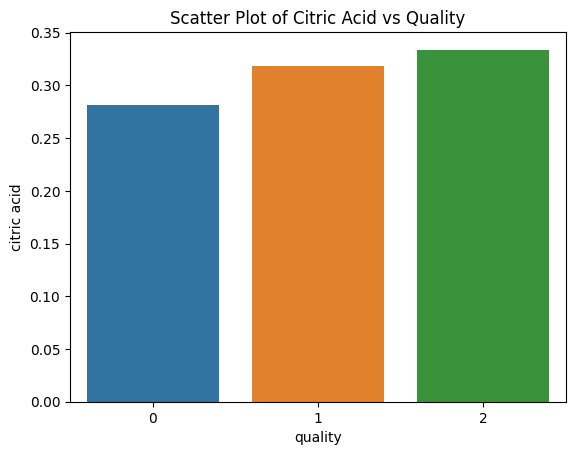

,T-Statistic,P-Value,Decision
0,-241.870788,0.0,Reject Null Hypothesis


In [19]:
def run_citric_acid_ttest(data):
    '''
    runs a Ttest for citric acid vs quality
    '''
    
    # First check if the columns are in the DataFrame
    if 'citric acid' not in data.columns or 'quality' not in data.columns:
        return "The required columns are not found in the DataFrame."
    
    # Define and print the hypothesis
    print("Null Hypothesis: There is no significant difference between the citric acid levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between the citric acid levels and wine quality.")
    
    # Create a scatter plot for visualization
    sns.barplot(x='quality', y='citric acid', data=data, ci = None)
    plt.title('Scatter Plot of Citric Acid vs Quality')
    plt.show()
    
    x = data['citric acid']
    y = data['quality']
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results

# Assuming `df` is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Run the t-test function
run_citric_acid_ttest(df)


Null Hypothesis: There is no significant difference between alcohol levels and wine quality.
Alternative Hypothesis: There is a significant difference between alcohol levels and wine quality.


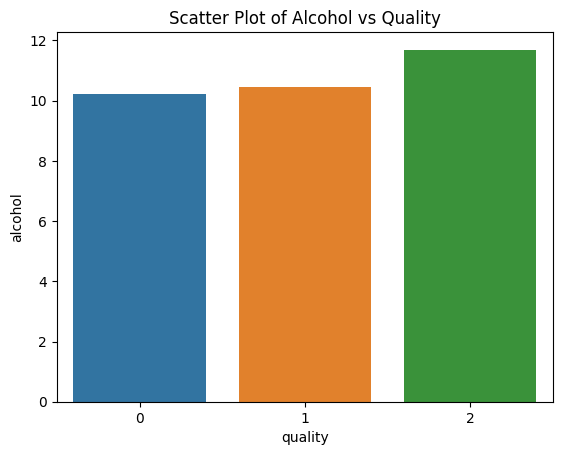

,T-Statistic,P-Value,Decision
0,632.108831,0.0,Reject Null Hypothesis


In [20]:
def run_alcohol_ttest(data):
    '''
    runs a Ttest for alcohol vs quality
    '''
    
    #  check if the columns are in the DataFrame
    if 'alcohol' not in data.columns or 'quality' not in data.columns:
        return "The required columns are not found in the DataFrame."
    
    # Define and print the hypothesis
    print("Null Hypothesis: There is no significant difference between alcohol levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between alcohol levels and wine quality.")
    
    #  scatter plot for visualization
    sns.barplot(x='quality', y='alcohol', data=data, ci = None)
    plt.title('Scatter Plot of Alcohol vs Quality')
    plt.show()
    
    x = data['alcohol']
    y = data['quality']
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results

# Assuming `df` is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Run the t-test function
run_alcohol_ttest(df)


Null Hypothesis: There is no significant difference between the volatile acidity and wine quality.
Alternate Hypothesis: There is a significant difference between the volatile acidity level and wine quality.


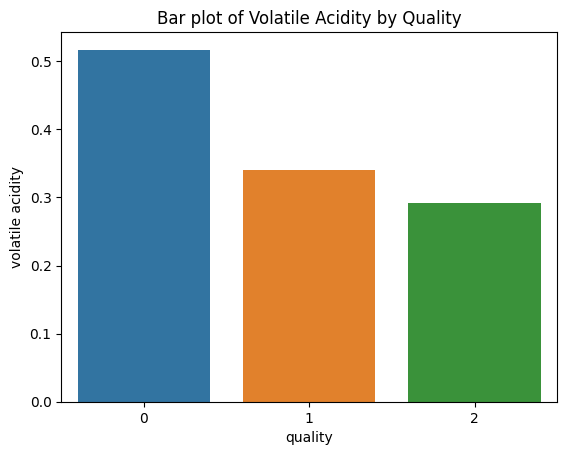

,T-Statistic,P-Value,Decision
0,-222.967325,0.0,Reject Null Hypothesis


In [21]:
def run_volatile_acidity_ttest(data):
    '''
    runs a Ttest for volatile acidity vs quality
    '''
    if 'volatile acidity' not in data.columns or 'quality' not in data.columns:
        return 'The required columns are not found in the DF.'

    # Define and print the hypothesis
    print('Null Hypothesis: There is no significant difference between the volatile acidity and wine quality.')
    print('Alternate Hypothesis: There is a significant difference between the volatile acidity level and wine quality.')

    # Bar plot for visualization
    sns.barplot(x='quality', y='volatile acidity', data=data, ci = None)
    plt.title('Bar plot of Volatile Acidity by Quality')
    plt.show()
    
    x = data['volatile acidity']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:  # Changed this line to be more accurate, as you typically reject the null if p <= alpha
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

run_volatile_acidity_ttest(df)


In [22]:
alpha = 0.05

In [23]:
overall_mean = train.quality.mean()
overall_mean

5.8201011656036945

In [24]:
#is there a relation between alcholol and quality

In [25]:

def scale_data_clusters(train, columns):
    """
    Scales specified columns in the training dataset using MinMaxScaler.

    Args:
        train (pd.DataFrame): The training DataFrame.
        columns (list): List of column names to be scaled.

    Returns:
        pd.DataFrame: A DataFrame with the specified columns scaled.
    """
    # Initialize the scaler
    scaler = MinMaxScaler()

    # Fit the scaler using the train dataset
    scaler.fit(train[columns])

    # Transform the specified columns in train
    train[columns] = scaler.transform(train[columns])

    return train


In [26]:
# Sample usage
scaled_train = scale_data_clusters(train, ['alcohol', 'citric acid'])
scaled_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3761,9.9,0.49,0.186992,2.4,0.087,19.0,115.0,0.9948,2.77,0.44,0.231405,6
3740,7.7,0.28,0.284553,15.3,0.056,31.0,117.0,0.9998,3.27,0.50,0.264463,5


In [27]:
def plot_elbow(data, max_clusters):
    """
    Plot the elbow graph to find an optimal value for n_clusters in KMeans.
    
    Args:
        data (pd.DataFrame): The DataFrame to be clustered.
        max_clusters (int): The maximum number of clusters to test.
        
    Returns:
        None
    """
    inertia = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters+1), inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow method to determine optimal number of clusters')
    plt.show()



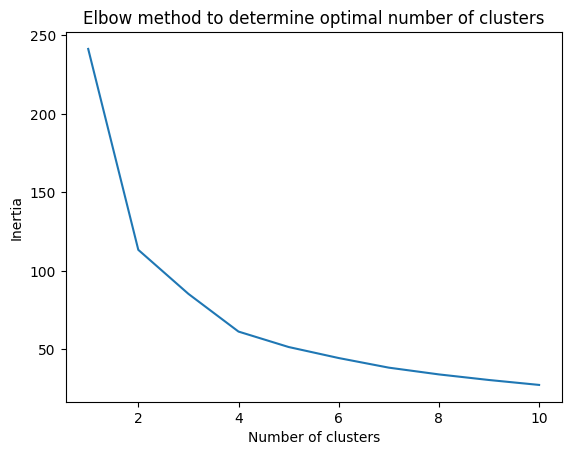

In [28]:
plot_elbow(scaled_train[['alcohol', 'citric acid']], max_clusters=10)


In [29]:
def create_clusters(data, n_clusters):
    """
    Create clusters for the data using KMeans.
    
    Args:
        data (pd.DataFrame): The DataFrame to be clustered.
        n_clusters (int): The optimal number of clusters.
        
    Returns:
        pd.Series: A series containing cluster labels for each row in the data.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters




In [30]:
# Sample usage:
clusters = create_clusters(scaled_train[['alcohol', 'citric acid']], n_clusters=4)
scaled_train['cluster'] = clusters

In [37]:

from sklearn.cluster import KMeans

def find_clusters(train, variable1, variable2, variable3):
    '''
    Inputs:
    train - the dataset
    variable1, variable2, variable3 - feature names as strings in search of potential clusters
    Outputs:
    Plot with clusters & modified train dataframe with an additional 'cluster' column.
    '''
    
    # create a subset of train with the specified variables
    X = train[[variable1, variable2, variable3]]
    
    # initiate and fit kmeans
    kmeans = KMeans(n_clusters=3, random_state=42) 
    kmeans.fit(X)
    train['cluster'] = kmeans.predict(X)
    
    # Create centroids dataframe for potential use or display
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[variable1, variable2, variable3])
    
    # Rename cluster labels for clarity in visualization
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    
    #Plot the actual distribution of quality next to generated clusters
    fig, axes = plt.subplots(1, 2, figsize=(16, 9))
    
    sns.scatterplot(ax=axes[0], x=variable1, y=variable2, hue='quality', palette='colorblind', data=train)
    axes[0].set_title("Actual Distribution of Quality")
    
    sns.scatterplot(ax=axes[1], x=variable1, y=variable2, hue='cluster', palette='colorblind', data=train)
    axes[1].set_title("Clusters Generated by KMeans")
    
    plt.show()
    
    return train


In [47]:

train, val, test = w.train_val_test(df)



# Cluster 1: 'fixed_acidity', 'residual_sugar', 'density'
'

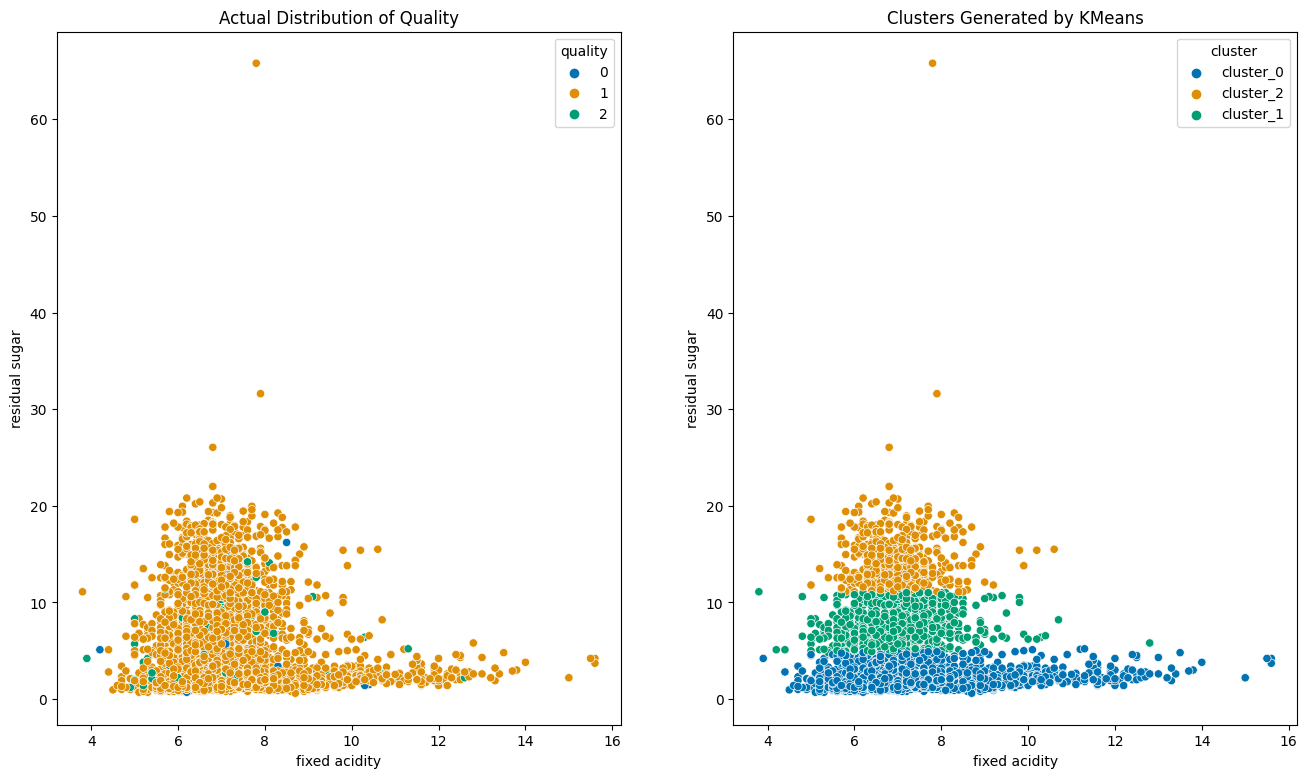

In [68]:
# visual for 'fixed_acidity', 'residual_sugar', 'density' actual vs predicted

new_train1 = find_clusters(train, 'fixed acidity', 'residual sugar', 'density')


# Cluster 2: 'ph', 'density', 'chlorides'

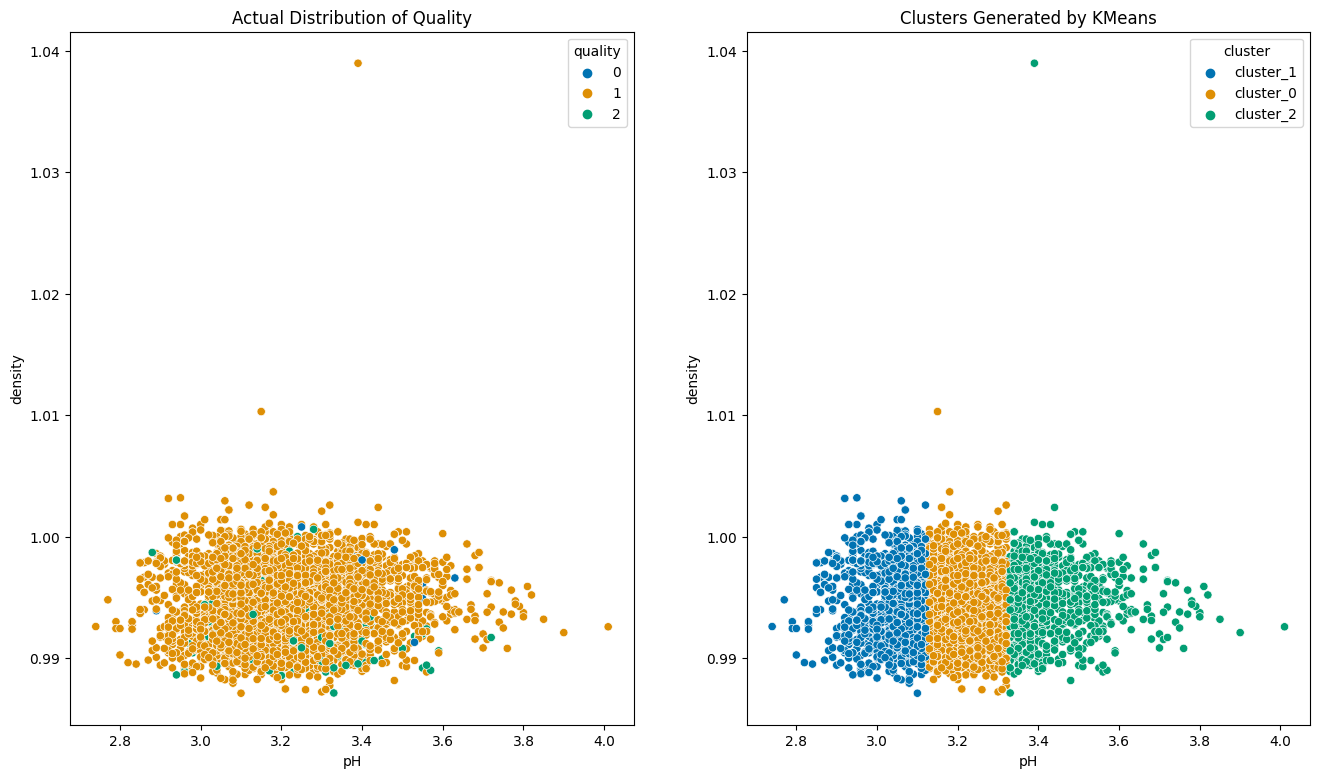

In [65]:
# visual for 'ph', 'density', 'chlorides' actual vs predicted
new_train2 = find_clusters(train,'pH', 'density', 'chlorides')

# Cluster 3: 'residual_sugar', 'citric_acid', 'white'

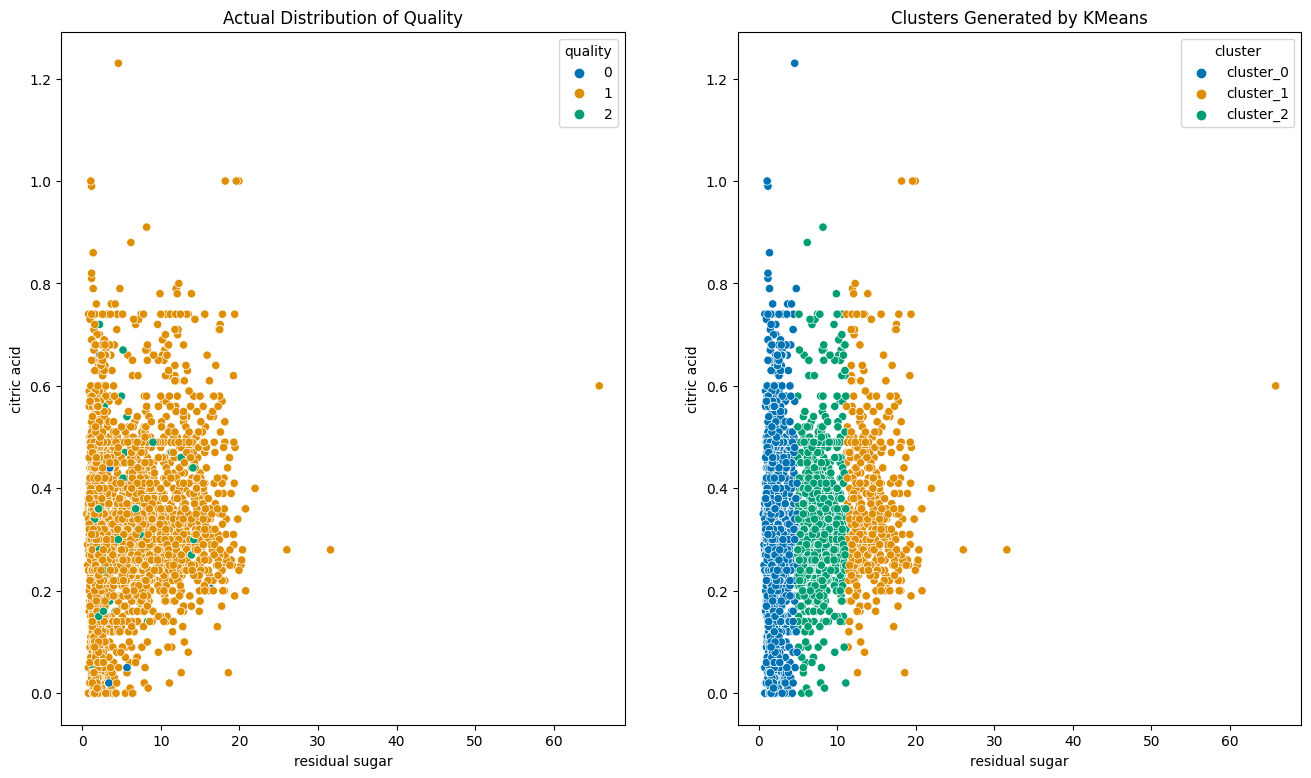

In [69]:
# visual for 'residual_sugar', 'citric_acid', 'white' actual vs predicted
new_train = find_clusters(train, 'residual sugar', 'citric acid', 'quality')

Charting Observations: 'residual_sugar', 'citric_acid', 'quality' actual vs predicted

potentially useful cluster

<Axes: xlabel='total sulfur dioxide', ylabel='volatile acidity'>

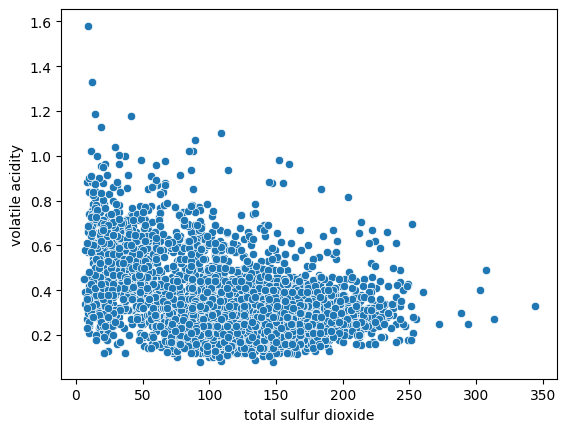

In [50]:
# total_sulfer_dioxide and volitile acidity look like plotted?
sns.scatterplot(train, x='total sulfur dioxide',y='volatile acidity')


In [53]:
# fixed_acidity and sulphates plotted

<Axes: xlabel='fixed acidity', ylabel='sulphates'>

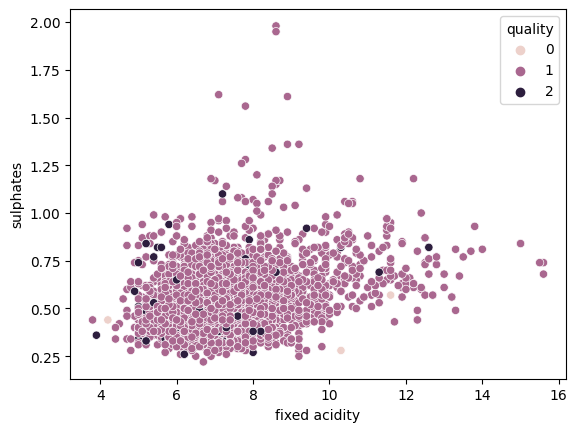

In [56]:
sns.scatterplot(train, x='fixed acidity', y='sulphates', hue='quality')


<Axes: xlabel='fixed acidity', ylabel='sulphates'>

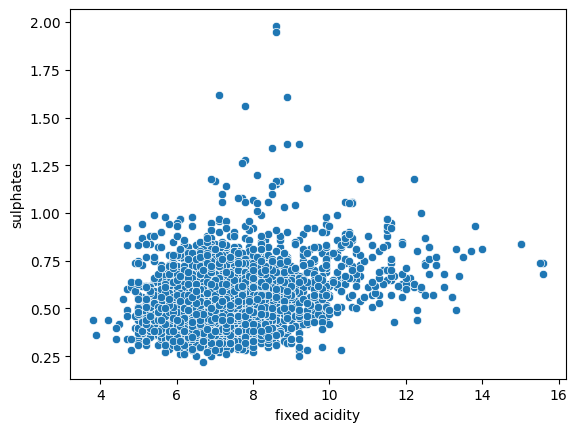

In [58]:
sns.scatterplot(train, x='fixed acidity', y='sulphates')


In [51]:
explore_cols = ['quality', 'alcohol', 'density']


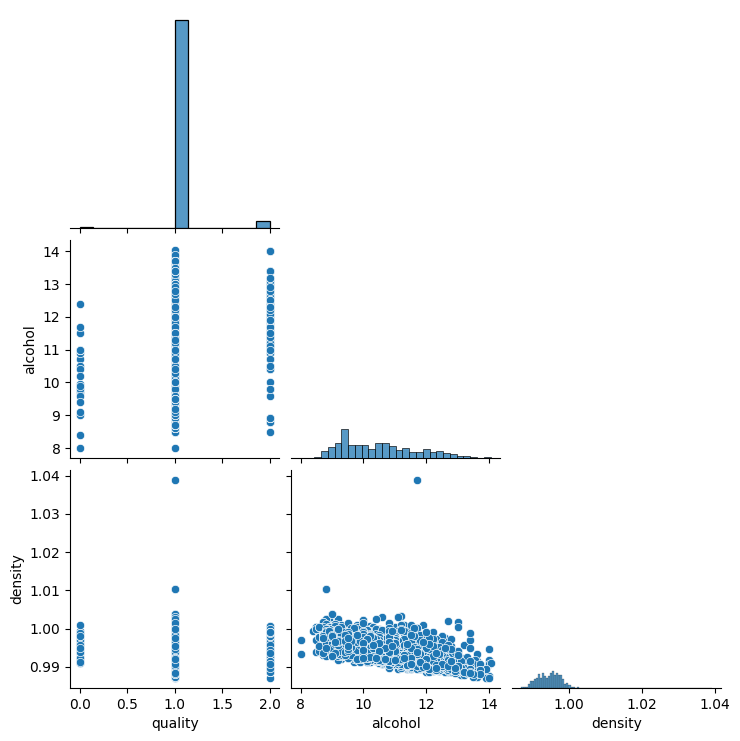

In [52]:
sns.pairplot(data=train[explore_cols], corner=True)


In [59]:
# Does alcohol content determine the quality?



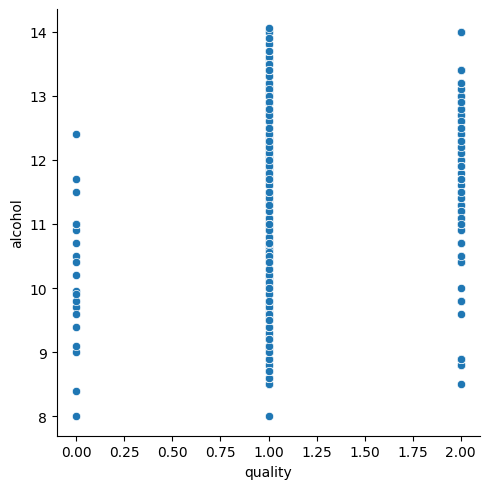

In [60]:
sns.relplot(train, x='quality', y='alcohol')


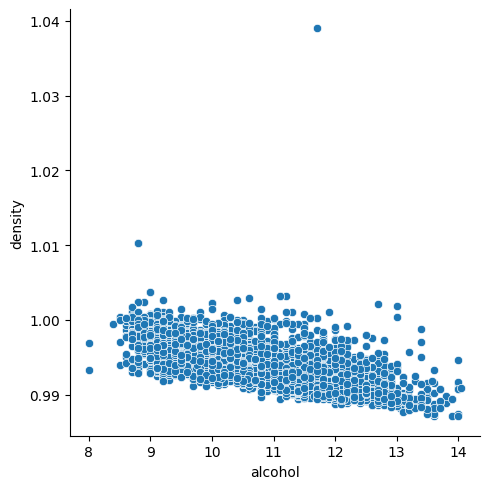

In [61]:
sns.relplot(train, x = 'alcohol', y= 'density')


In [ ]:
new_train1 =find_clusters(X_train_scaled2, 'fixed_acidity', 'residual_sugar', 'density')
